
#**Twitter US Airline Sentiment - Problem Statement**


## **Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").




**Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone


**Objective:**

To implement the techniques learned as a part of the course.

**Learning Outcomes:**

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model


In [249]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
import pandas as pd
data=pd.read_csv('drive/My Drive/Tweets.csv')

In [253]:
data.shape                                               # print shape of data.

(14640, 15)

In [254]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [255]:
data.airline_sentiment_gold.unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [256]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [257]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [258]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping relevant columns from the data, as these are useful for our analysis.

data = data.loc[:49999, ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','name','retweet_count','text','tweet_location']]

In [259]:
data.isnull().sum(axis=0)  

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_location                  4733
dtype: int64

In [260]:
data=data.dropna()                                     # Dropping off missing values
data.columns   

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text',
       'tweet_location'],
      dtype='object')

In [261]:
data.head()  

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&amp;F number at LAX!",Washington DC


In [262]:
data.airline_sentiment.unique()

array(['negative'], dtype=object)

In [263]:
data.retweet_count.unique()

array([ 0,  1,  2,  3,  4, 18, 22, 31,  7,  5])

In [264]:
data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [265]:
data.shape      

(6036, 9)

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [266]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data['negativereason'] = data['negativereason'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&F number at LAX!",Washington DC


In [267]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data['negativereason'] = data['negativereason'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and could not fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we cannot get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one answering L&F number at LAX!",Washington DC


In [268]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data['negativereason'] = data['negativereason'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and could not fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we cannot get any cold air from the vents. #VX #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight IAD to LAX today. Seat A. No one answering L&F number at LAX!",Washington DC


In [269]:
def decontracted(phrase):
  # specific & general contracted words
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [270]:
data['text'] = data['text'].apply(lambda x: decontracted(x))
data['negativereason'] = data['negativereason'].apply(lambda x: decontracted(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and could not fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we cannot get any cold air from the vents. #VX #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight IAD to LAX today. Seat A. No one answering L&F number at LAX!",Washington DC


In [271]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data['negativereason'] = data['negativereason'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,Late Flight,0.3684,Virgin America,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,"palo alto, ca"
17,negative,1.0000,Bad Flight,1.0000,Virgin America,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last week and could not fully sit in my seat due to two large gentleman on either side of me. HELP!,this place called NYC
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America,ayeevickiee,0,@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet,714
28,negative,1.0000,Bad Flight,1.0000,Virgin America,blackjackpro911,0,@VirginAmerica amazing to me that we cannot get any cold air from the vents. #VX #noair #worstflightever #roasted #SFOtoBOS,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America,Cuschoolie1,0,"@VirginAmerica help, left expensive headphones on flight IAD to LAX today. Seat A. No one answering L&F number at LAX!",Washington DC


In [272]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data['negativereason'] = data.apply(lambda row: nltk.word_tokenize(row['negativereason']), axis=1) # Tokenization of data


In [273]:
data.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,"[Late, Flight]",0.3684,Virgin America,smartwatermelon,0,"[@, VirginAmerica, SFO-PDX, schedule, is, still, MIA, .]","palo alto, ca"
17,negative,1.0000,"[Bad, Flight]",1.0000,Virgin America,heatherovieda,0,"[@, VirginAmerica, I, flew, from, NYC, to, SFO, last, week, and, could, not, fully, sit, in, my, seat, due, to, two, large, gentleman, on, either, side, of, me, ., HELP, !]",this place called NYC
24,negative,1.0000,"[Customer, Service, Issue]",0.3557,Virgin America,ayeevickiee,0,"[@, VirginAmerica, you, guys, messed, up, my, seating, .., I, reserved, seating, with, my, friends, and, you, guys, gave, my, seat, away, ..., 😡, I, want, free, internet]",714
28,negative,1.0000,"[Bad, Flight]",1.0000,Virgin America,blackjackpro911,0,"[@, VirginAmerica, amazing, to, me, that, we, can, not, get, any, cold, air, from, the, vents, ., #, VX, #, noair, #, worstflightever, #, roasted, #, SFOtoBOS]","San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,"[Customer, Service, Issue]",1.0000,Virgin America,Cuschoolie1,0,"[@, VirginAmerica, help, ,, left, expensive, headphones, on, flight, IAD, to, LAX, today, ., Seat, A, ., No, one, answering, L, &, F, number, at, LAX, !]",Washington DC


In [274]:
   
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [275]:
from nltk.stem.wordnet import WordNetLemmatizer 
import nltk
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data['negativereason'] = data.apply(lambda row: normalize(row['negativereason']), axis=1)

data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location
15,negative,0.6842,late flight,0.3684,Virgin America,smartwatermelon,0,virginamerica sfopdx schedule still mia,"palo alto, ca"
17,negative,1.0000,bad flight,1.0000,Virgin America,heatherovieda,0,virginamerica fly nyc sfo last week could not fully sit seat due two large gentleman either side help,this place called NYC
24,negative,1.0000,customer service issue,0.3557,Virgin America,ayeevickiee,0,virginamerica guy mess seat reserve seat friends guy give seat away want free internet,714
28,negative,1.0000,bad flight,1.0000,Virgin America,blackjackpro911,0,virginamerica amaze not get cold air vent vx noair worstflightever roast sfotobos,"San Mateo, CA & Las Vegas, NV"
32,negative,1.0000,customer service issue,1.0000,Virgin America,Cuschoolie1,0,virginamerica help leave expensive headphones flight iad lax today seat one answer l f number lax,Washington DC


### **Word Cloud based on text and Score**

In [276]:

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

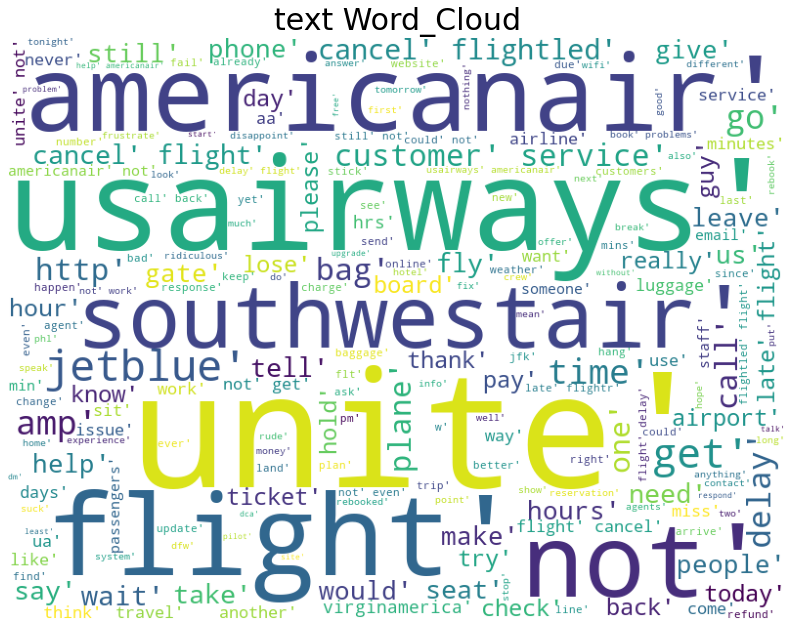

In [239]:
show_wordcloud(data,'text Word_Cloud')

- Most of the word in the word text column are airline and negative sentiments
- We can see the most frequent words choosen by consumers to express their sentiment for the airline

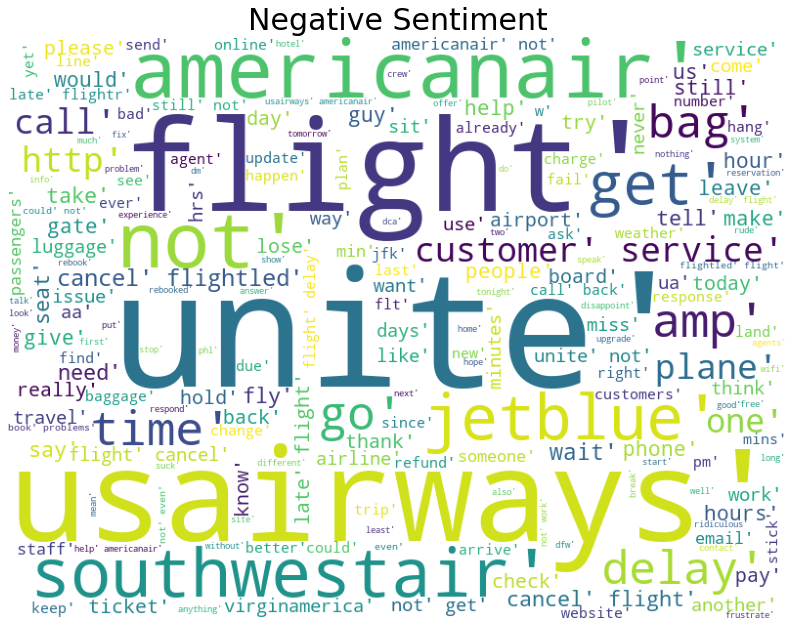

In [240]:
show_wordcloud(data[data.airline_sentiment == 'negative'], title = "Negative Sentiment")

- Consumers are complaining about time, gate issue , cancel, service , ticket ,board, delay, luggage, bag, seat, pay, refund etc.


In [241]:
data['negativereason'] = data.apply(lambda row: nltk.word_tokenize(row['negativereason']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['negativereason'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

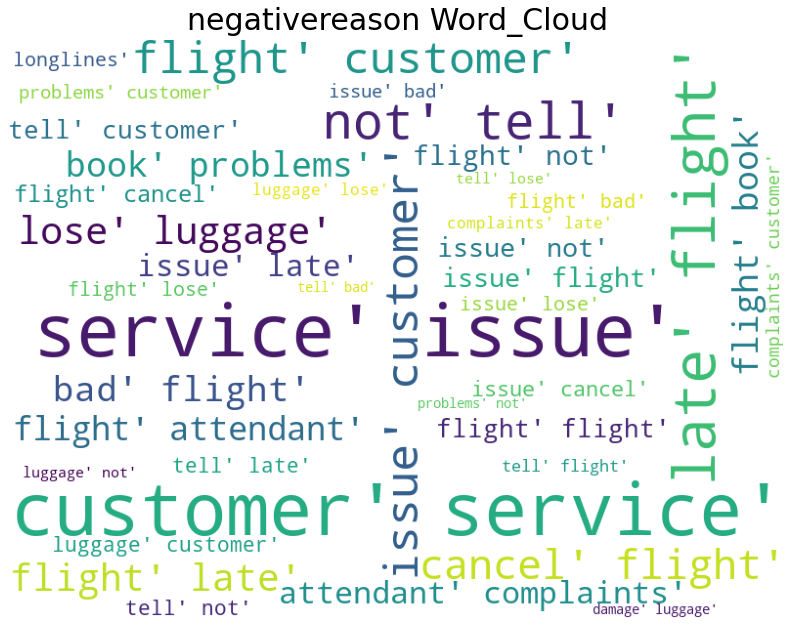

In [242]:
show_wordcloud(data,'negativereason Word_Cloud')

- We can see the different degree of sentiment words are used by consumers to express their emotions for negative reason.

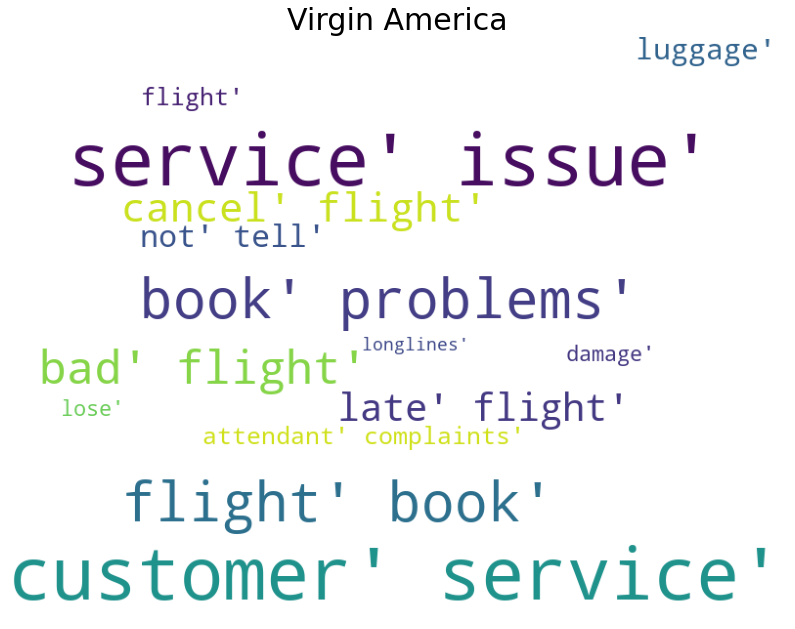

In [243]:
show_wordcloud(data[data.airline == 'Virgin America'], title = "Virgin America")

- We can see the different degree of sentiment words are used by consumers to express their emotions about the airline that about service, late,cancel,book ,luggage etc.

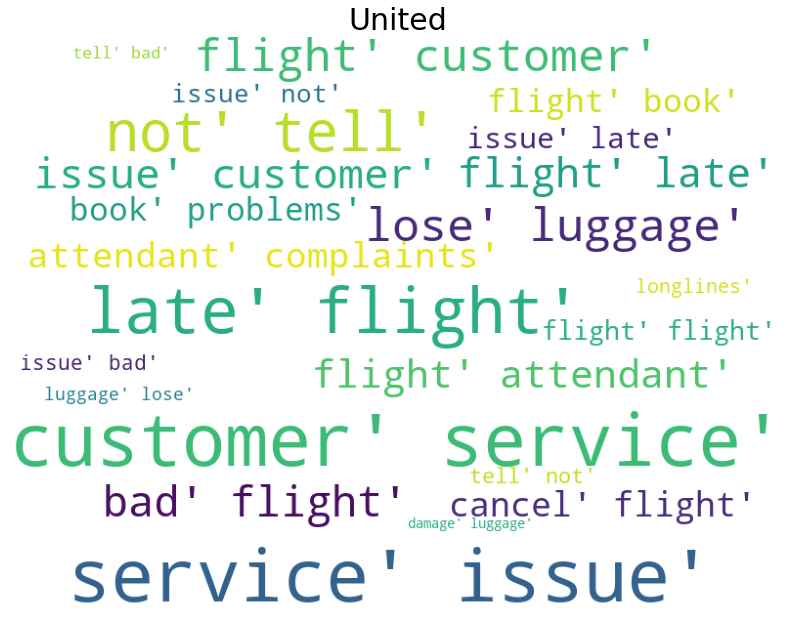

In [244]:
show_wordcloud(data[data.airline == 'United'], title = "United")

- We can see the different degree of sentiment words are used by consumers to express their emotions about the airline that about service, late,book ,loss/damage luggage etc.

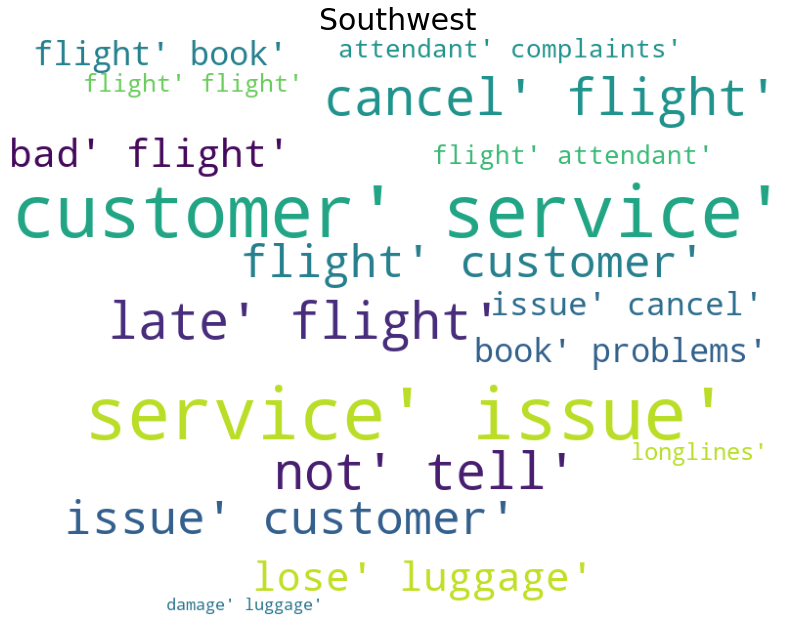

In [245]:
show_wordcloud(data[data.airline == 'Southwest'], title = "Southwest")

- We can see the different degree of sentiment words are used by consumers to express their emotions about the airline that about service, late,book ,attendant, loss/damage luggage etc.

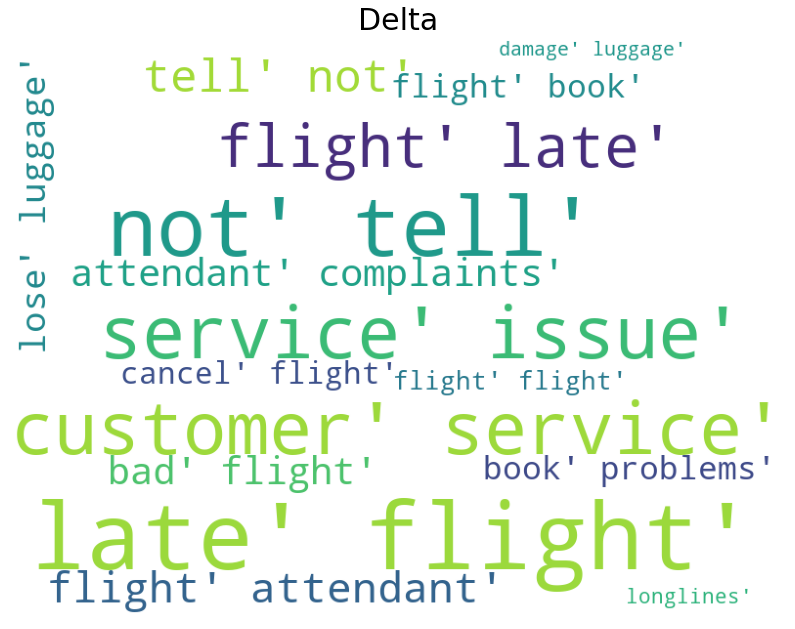

In [246]:
show_wordcloud(data[data.airline == 'Delta'], title = "Delta")

- We can see the different degree of sentiment words are used by consumers to express their emotions about the airline that about service, cancel, late,book ,attendant, loss/damage luggage etc.

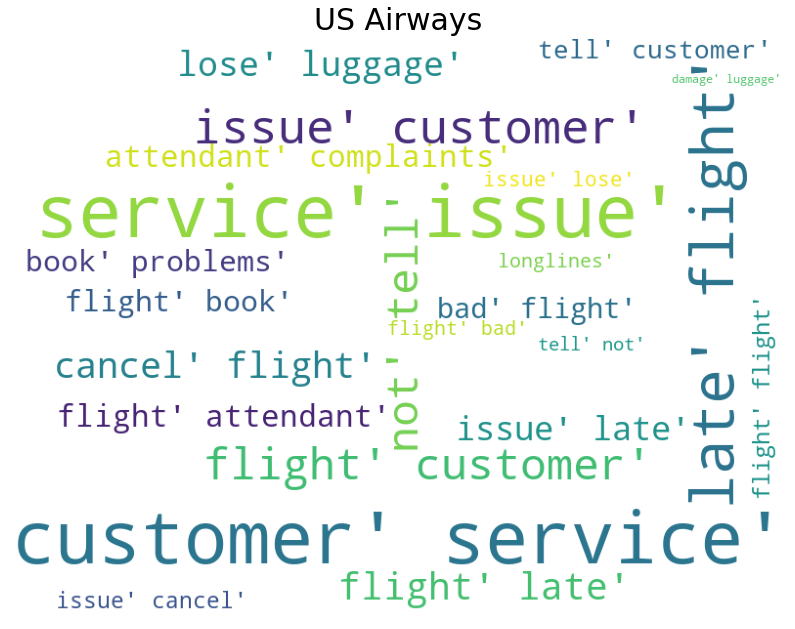

In [247]:
show_wordcloud(data[data.airline == 'US Airways'], title = 'US Airways')

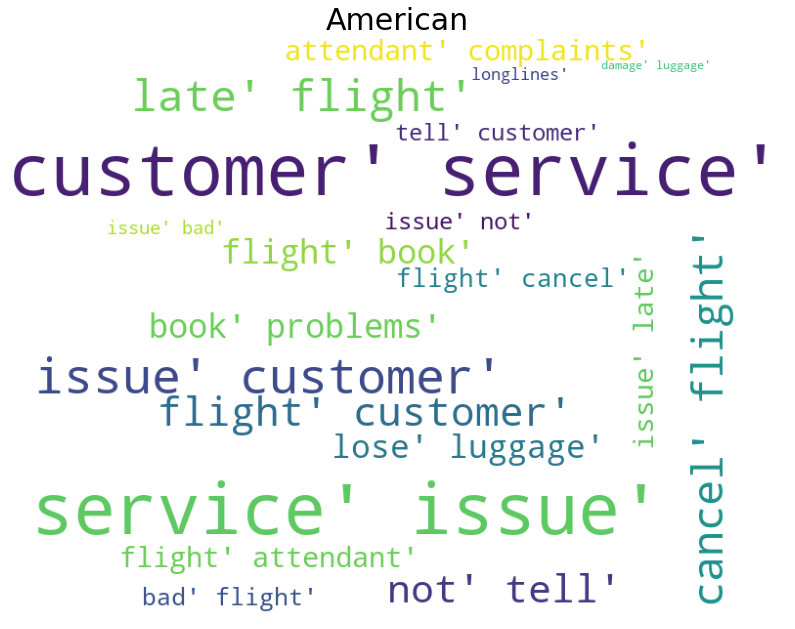

In [248]:
show_wordcloud(data[data.airline == 'American'], title = 'American')

We can see the degreee of variance levels  in each sentiment words of consumers to express their emotions about their airline concerns  about service, cancel , book ,attendant, loss/damage luggage etc.

### **Building the model based on CountVectorizer and Random Forest**

In [189]:
# Vectorization (Convert text data to numbers).

from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data_features = bow_vec.fit_transform(data['text'])
 
data_features = data_features.toarray()                        # Convert the data features to array.

In [190]:
data_features.shape

(6036, 2000)

In [191]:
labels = data['retweet_count']
labels = labels.astype('int')

In [192]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [193]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.9285990027786015


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [194]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [195]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

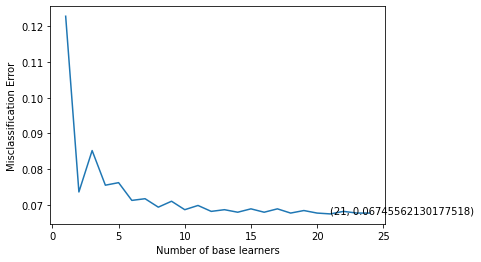

In [196]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [197]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9420209828823854

In [198]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[1702    2    0    0    0    1]
 [  91    4    0    0    0    0]
 [   9    0    0    0    0    0]
 [   1    0    0    0    0    0]
 [   1    0    0    0    0    0]
 [   0    0    0    0    0    0]]
0.9420209828823854


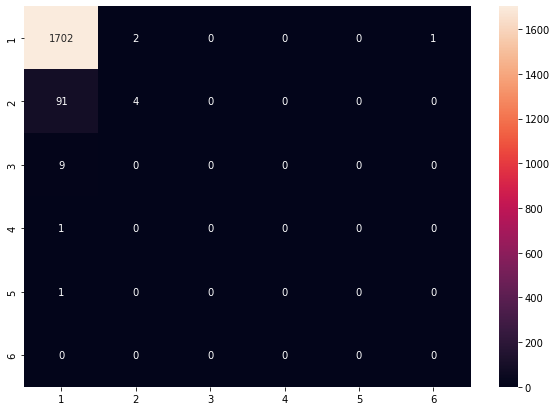

In [200]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123456"],
                  columns = [i for i in "123456"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


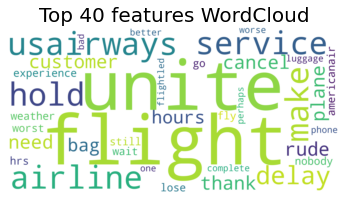

In [201]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [203]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(6036, 2000)

In [204]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [205]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.9262760826744652


In [206]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

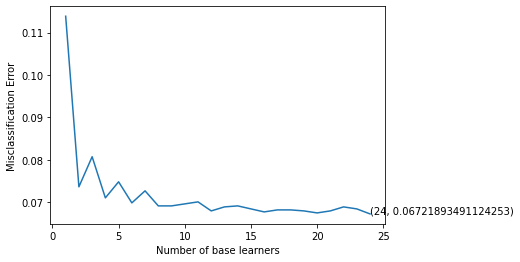

In [207]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [208]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9409166206515737

In [209]:
result = clf.predict(X_test)

[[1703    2    0    0    0]
 [  94    1    0    0    0]
 [   9    0    0    0    0]
 [   1    0    0    0    0]
 [   1    0    0    0    0]]
0.9409166206515737


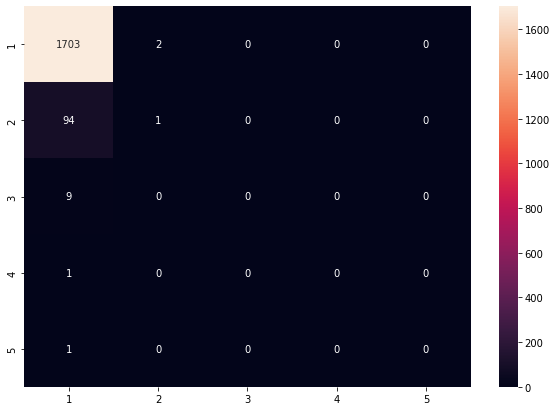

In [210]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


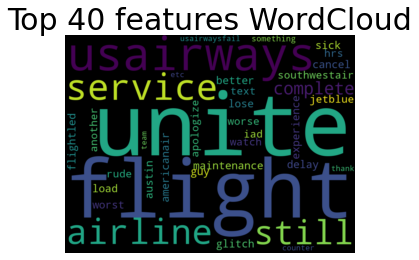

In [211]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

- We used a dataset which has **reviews in text format and their retweet count range from 0 to 31**
- The goal was to **build a model for text-classification**.
- We **created the text and negativereason column** based on the retweet count.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on text and negativereason and negative_sentiment.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- However, **we can still increase the accuracy of our model by increasing the dataset we took into account for the model building** (We've currently only used 6,036 entries out of around 14,640 entries, which means **we built our current model using just 41% of the dataset**) 
- We can also increase the **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.